In [105]:
import json
import pandas as pd
import numpy as np
import os
import datetime

In [99]:
files = os.listdir('data')
records = []
for file_name in files:
    with open(os.path.join('data', file_name), 'r') as f:
        record = json.load(f)
        if 'status_message' not in record.keys():
            records.append(record)
df = pd.json_normalize(records)

df['genres.name'] = df['genres'].apply(lambda x: ', '.join([i['name'] for i in x]))
df['origin_country'] = df['origin_country'].apply(lambda x: ', '.join(x))
df['spoken_languages.english_name'] = df['spoken_languages'].apply(lambda x: ', '.join([i['english_name'] for i in x]))
df['spoken_languages.iso_639_1'] = df['spoken_languages'].apply(lambda x: ', '.join([i['iso_639_1'].upper() for i in x]))
df['spoken_languages.name'] = df['spoken_languages'].apply(lambda x: ', '.join([i['name'] for i in x]))
df['production_companies.logo_path'] = df['production_companies'].apply(lambda x: ', '.join([i['logo_path'] or '' for i in x]))
df['production_companies.name'] = df['production_companies'].apply(lambda x: ', '.join([i['name'] for i in x] if x else ''))
df['production_companies.origin_country'] = df['production_companies'].apply(lambda x: ', '.join({i['origin_country'] for i in x}))
df['production_countries.iso_3166_1'] = df['production_countries'].apply(lambda x: ', '.join([i['iso_3166_1'] for i in x]))
df['production_countries.name'] = df['production_countries'].apply(lambda x: ', '.join([i['name'] for i in x]))

df.drop(columns=['genres', 'spoken_languages', 'production_companies', 'production_countries'], axis=1, inplace=True)

In [101]:
df.loc[0]

adult                                                                              False
backdrop_path                                           /jyUcUMvLdUon3HPjbUdAsm754G6.jpg
belongs_to_collection                                                                NaN
budget                                                                            730000
homepage                                                                                
id                                                                                   288
imdb_id                                                                        tt0044706
origin_country                                                                        US
original_language                                                                     en
original_title                                                                 High Noon
overview                               Will Kane, the sheriff of a small town in New ...
popularity           

In [118]:
df['year'] = pd.DatetimeIndex(df['release_date']).year
df_year = df.groupby('year')
df_year.describe()


belongs_to_collection                              budget                \
                     count mean std min 25% 50% 75% max  count          mean   
year                                                                           
1874                   0.0  NaN NaN NaN NaN NaN NaN NaN    1.0  0.000000e+00   
1887                   0.0  NaN NaN NaN NaN NaN NaN NaN    1.0  0.000000e+00   
1888                   0.0  NaN NaN NaN NaN NaN NaN NaN    1.0  0.000000e+00   
1891                   0.0  NaN NaN NaN NaN NaN NaN NaN    3.0  0.000000e+00   
1892                   0.0  NaN NaN NaN NaN NaN NaN NaN    2.0  0.000000e+00   
...                    ...  ...  ..  ..  ..  ..  ..  ..    ...           ...   
2020                   0.0  NaN NaN NaN NaN NaN NaN NaN    8.0  1.589375e+07   
2021                   0.0  NaN NaN NaN NaN NaN NaN NaN   15.0  3.916000e+07   
2022                   0.0  NaN NaN NaN NaN NaN NaN NaN   11.0  8.145455e+07   
2023                   0.0  NaN NaN NaN NaN NaN NaN NaN    9.0  6.166667e+07   
2024                   0.0  NaN NaN NaN NaN NaN NaN NaN    5.0  1.480000e+08   

      ... vote_count          belongs_to_collection.id             \
      ...        75%      max                    count       mean   
year  ...                                                           
1874  ...     109.00    109.0                      0.0        NaN   
1887  ...      81.00     81.0                      0.0        NaN   
1888  ...     210.00    210.0                      0.0        NaN   
1891  ...      65.00     69.0                      0.0        NaN   
1892  ...      74.00     96.0                      0.0        NaN   
...   ...        ...      ...                      ...        ...   
2020  ...    3156.75   5642.0                      0.0        NaN   
2021  ...    5499.00  19856.0                      2.0  629056.00   
2022  ...    5154.00  11702.0                      3.0  563338.00   
2023  ...    8865.00   8922.0                      0.0        NaN   
2024  ...    3495.00   5213.0                      4.0  553175.25   

                                                                         
                std       min       25%       50%        75%        max  
year                                                                     
1874            NaN       NaN       NaN       NaN        NaN        NaN  
1887            NaN       NaN       NaN       NaN        NaN        NaN  
1888            NaN       NaN       NaN       NaN        NaN        NaN  
1891            NaN       NaN       NaN       NaN        NaN        NaN  
1892            NaN       NaN       NaN       NaN        NaN        NaN  
...             ...       ...       ...       ...        ...        ...  
2020            NaN       NaN       NaN       NaN        NaN        NaN  
2021  138331.299604  531241.0  580148.5  629056.0  677963.50   726871.0  
2022  493025.870076   87096.0  309213.0  531330.0  801459.00  1071588.0  
2023            NaN       NaN       NaN       NaN        NaN        NaN  
2024  428753.830106   14890.0  339835.0  587510.5  800850.75  1022790.0  

[135 rows x 72 columns]

Text(0, 0.5, 'Budget (millions of $)')

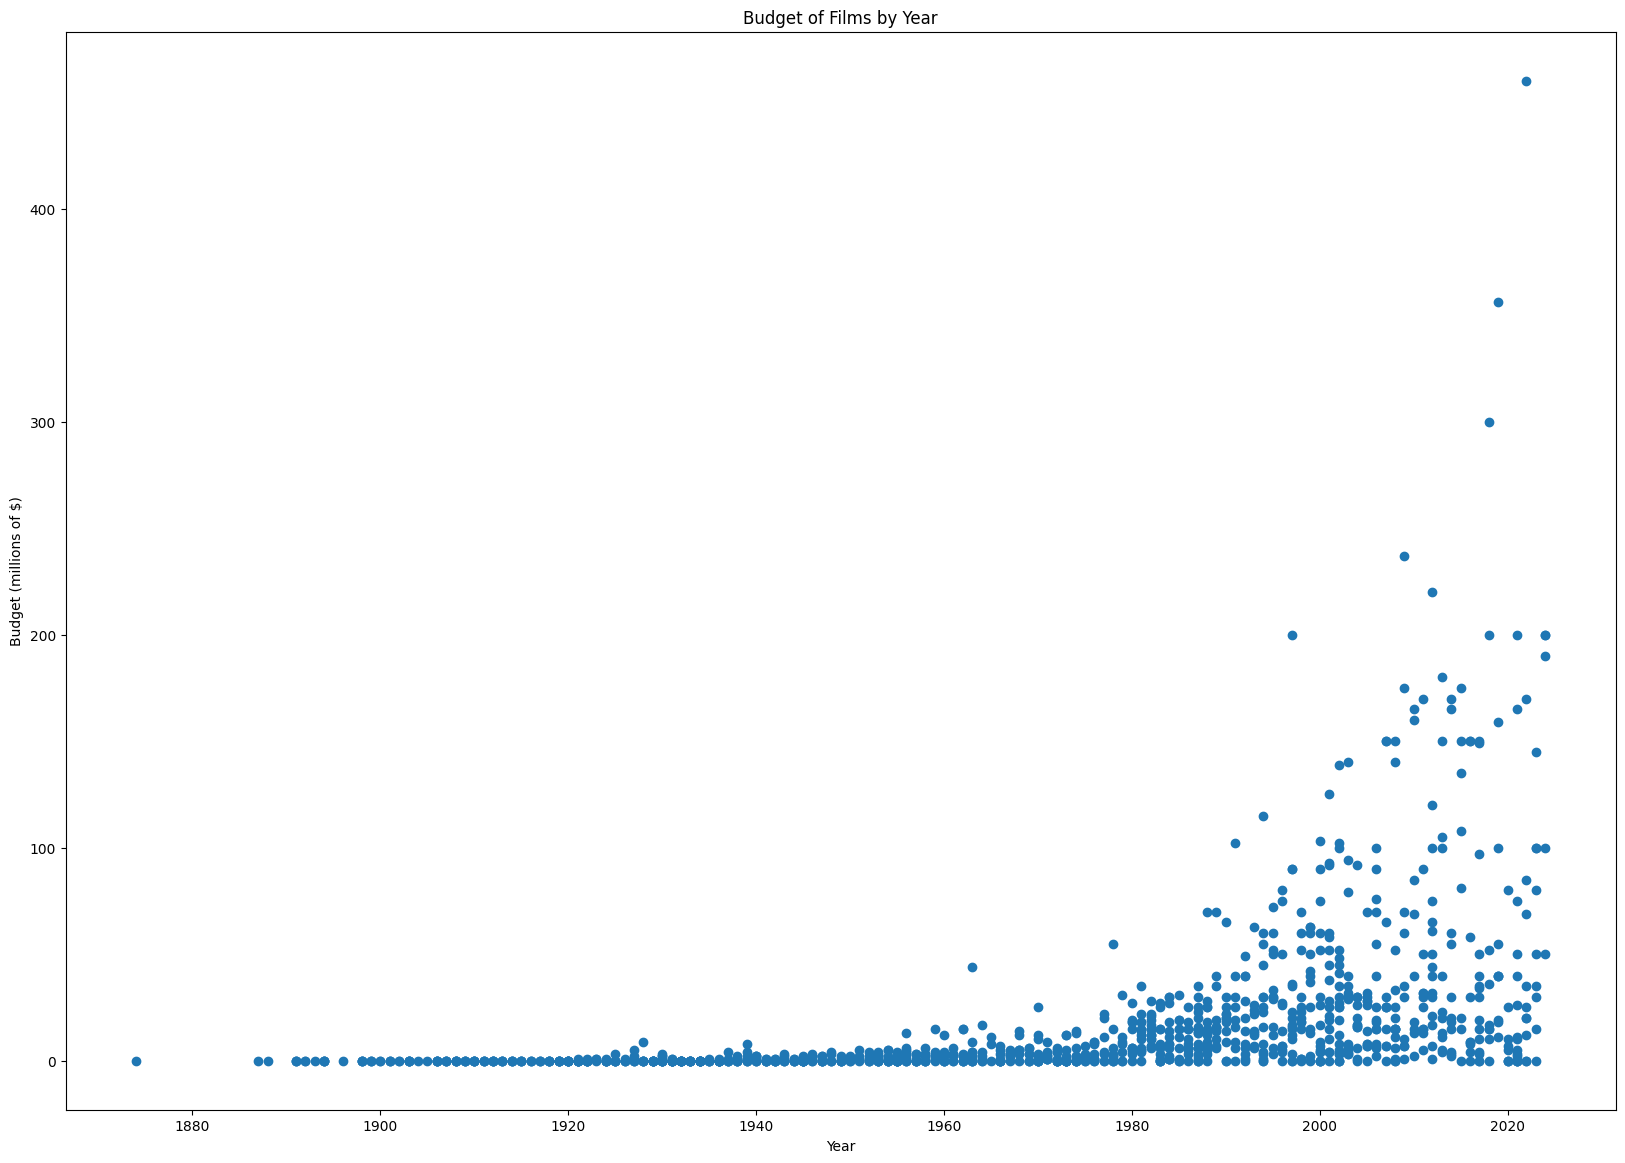

In [131]:
import matplotlib.pyplot as plt

year_min = 1980
year_max = 2024

# Plot the scatter plot
plt.figure(figsize=(20, 14))
plt.scatter(df['year'], df['budget'] // 1_000_000)


# Add a title and labels
plt.title('Budget of Films by Year')
plt.xlabel('Year')
plt.ylabel('Budget (millions of $)')